In [1]:
from utils import *
from fenics import *
from dolfin import *
import pyvista as pv
import fenics as fe

m,p=make_mesh(center=(0.5,0.5,-0.5),radius=0.3,normal=(0.1,0.5,1),n_sides=5)
#number of bodies in m
print(len(m.split_bodies()))

save_xdmf(m)

pp=pv.Plotter()
pp.add_mesh(m,show_edges=True)
pp.add_mesh(p,show_edges=True)
pp.show()

1


Widget(value="<iframe src='http://localhost:46029/index.html?ui=P_0x7f2131600190_0&reconnect=auto' style='widt…

In [86]:
f = XDMFFile('m_t.xdmf')
mesh_l=Mesh()
f.read(mesh_l)
mesh_l
simulate(mesh_l,plot_displacement=True,plot_stress=
True,plot_mesh=True,E=20e5,mu=10e5,rho_0=200.0,g_int=1000,b_int=-100)

RuntimeError: 

*** -------------------------------------------------------------------------
*** DOLFIN encountered an error. If you are not able to resolve this issue
*** using the information listed below, you can ask for help at
***
***     fenics-support@googlegroups.com
***
*** Remember to include the error message listed below and, if possible,
*** include a *minimal* running example to reproduce the error.
***
*** -------------------------------------------------------------------------
*** Error:   Unable to create Dirichlet boundary condition.
*** Reason:  Illegal value dimension (2), expecting (3).
*** Where:   This error was encountered inside DirichletBC.cpp.
*** Process: 0
*** 
*** DOLFIN version: 2019.1.0
*** Git changeset:  12ef077802cc9fad34cf984ec7af80585b44301b
*** -------------------------------------------------------------------------


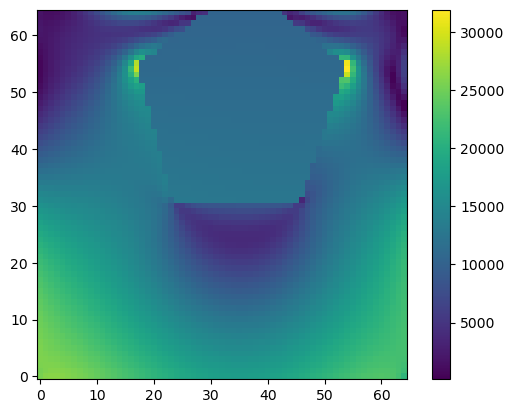

In [85]:
x = np.linspace(0, 1, 65)
y = np.linspace(0, 1, 65)
x, y = np.meshgrid(y, x)
z = np.zeros_like(x)
grid = pv.StructuredGrid(y, x, z)
res_von = pv.read("von_Mises.pvd")
# res_von["Block-00"].plot()

grid_with_val = grid.interpolate(res_von["Block-00"],strategy="closest_point")
res_von["Block-00"].array_names[0]

# von_val = grid_with_val["f_144"].reshape((33, 33))
vv=grid_with_val[res_von["Block-00"].array_names[0]].reshape((65, 65))
vv=np.array(vv)
plt.imshow(vv,origin="lower")
plt.colorbar()

In [9]:
vv.max(),vv.min()



(31906.620416723264, 119.88604933374933)

In [10]:
grid_with_val[res_von["Block-00"].array_names[0]].min(),grid_with_val[res_von["Block-00"].array_names[0]].max()

(119.88604933374933, 31906.620416723264)

In [11]:
grid_with_val.plot(show_edges=True)

Widget(value="<iframe src='http://localhost:38927/index.html?ui=P_0x7f916826bb10_2&reconnect=auto' style='widt…

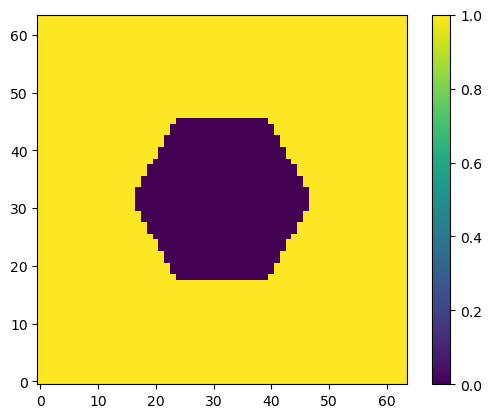

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Define function to check if a point is inside a regular polygon
def in_polygon(x, y, center, radius, n):
    angle = np.arctan2(y-center[1], x-center[0])
    return np.sqrt((x-center[0])**2 + (y-center[1])**2) <= radius * np.cos(np.pi/n) / np.cos(angle % (2*np.pi/n) - np.pi/n)

# Create a grid of points
x, y = np.meshgrid(np.linspace(-1, 1, 64), np.linspace(-1, 1, 64))

# Set the number of sides
n = 6

# Apply function to every point in the grid
mask = in_polygon(x, y, center=[0, 0], radius=0.5, n=n)

# Invert the mask
inverted_mask = 1 - mask

# Plot the result as an image
plt.imshow(inverted_mask, origin='lower')
plt.colorbar()
plt.show()


In [107]:
bin_img = inverted_mask
bin_img = bin_img.astype(np.uint8)
bin_img= bin_img[np.newaxis, :, :]
gg=pv.wrap(bin_img)
mesh = gg.threshold([0.5, 1.0]).triangulate()
mesh=mesh.extract_geometry()

mesh.plot(show_edges=True)
mesh.save("test.ply")
mesh

Widget(value="<iframe src='http://localhost:38927/index.html?ui=P_0x7f9160763b50_32&reconnect=auto' style='wid…

PolyData (0x7f911c3954e0)
  N Cells:    6740
  N Points:   3552
  N Strips:   0
  X Bounds:   0.000e+00, 0.000e+00
  Y Bounds:   0.000e+00, 6.300e+01
  Z Bounds:   0.000e+00, 6.300e+01
  N Arrays:   3

In [108]:
import meshio
mesh = meshio.read("test.ply")

#save as xml

mesh.points=mesh.points[:,:2]
mesh.points
meshio.write("test.xdmf", mesh)

In [109]:
nn=pv.read("test.xdmf")
nn.plot(show_edges=True)

Widget(value="<iframe src='http://localhost:38927/index.html?ui=P_0x7f911c4b7210_33&reconnect=auto' style='wid…

 JS Error => error: Uncaught TypeError: Cannot read properties of null (reading '0')
